In [18]:
import tensorflow as tf
import keras
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Reshape the data to fit the model
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Build the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the results to feed into a dense layer
model.add(layers.Flatten())

# Fully connected (Dense) layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for the digits 0-9

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8681 - loss: 0.4292 - val_accuracy: 0.9823 - val_loss: 0.0517
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9842 - loss: 0.0526 - val_accuracy: 0.9888 - val_loss: 0.0354
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9899 - val_loss: 0.0309
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9933 - loss: 0.0222 - val_accuracy: 0.9916 - val_loss: 0.0258


In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0307
Test accuracy: 0.9916


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [12]:
# Define a new model that will output the feature maps at each convolutional and pooling layer

# First we grah the output of the first 6 layers because that is all we care to visualize 
layer_outputs = [layer.output for layer in model.layers[:6]]  # Get the outputs of the first 6 layers

layer_input = [layer.input for layer in model.layers[:1]]

In [13]:
activation_model = models.Model(layer_input, outputs=layer_outputs)

In [14]:
# Choose an image to visualize (from test set)
test_image = test_images[11].reshape(1, 28, 28, 1)

In [15]:
# Lets see what the model we trained actually outputs for that image
temp = model.predict(test_image)

# Get the softmax output 
temp2=temp[0]
print(temp2) # softmax output 

# Get the highest value which is actually going to be our prediction 
print(max(temp2))

# The index represents the number 0 - 9 
print(np.where(temp2==(max(temp2))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[4.1754009e-07 2.9680311e-13 5.5729554e-15 2.1163035e-16 8.5600228e-13
 1.2138612e-09 9.9999952e-01 9.1246751e-16 3.3748770e-09 7.1747005e-16]
0.9999995
(array([6]),)


In [16]:
# Get the activations for this test image
activations = activation_model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Visualizing layer: Conv2D 1 with 32 filters


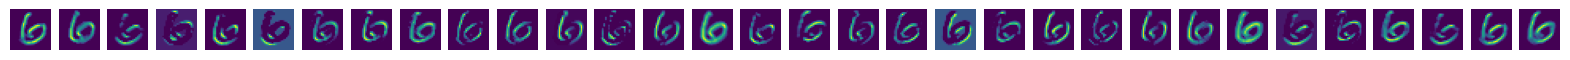

Visualizing layer: MaxPooling 1 with 32 filters


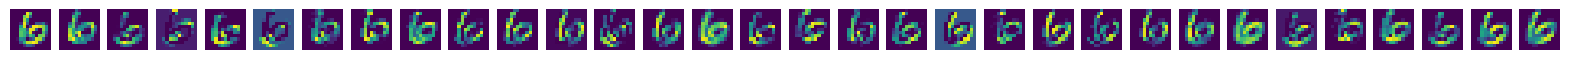

Visualizing layer: Conv2D 2 with 64 filters


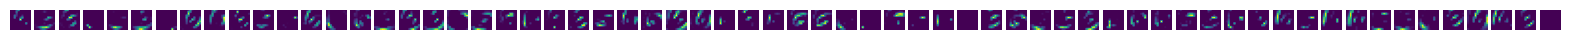

Visualizing layer: MaxPooling 2 with 64 filters


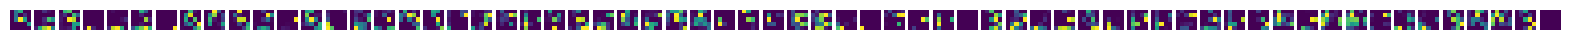

Visualizing layer: Conv2D 3 with 64 filters


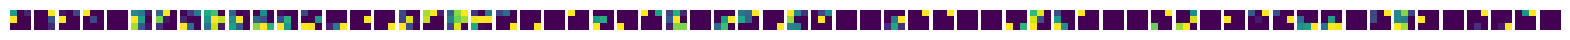

In [19]:
# Visualize the feature maps for each layer
layer_names = ['Conv2D 1', 'MaxPooling 1', 'Conv2D 2', 'MaxPooling 2', 'Conv2D 3']

# Plot the activations
for i, activation in enumerate(activations[:5]):  # Skip fully connected layers
    num_filters = activation.shape[-1]
    size = activation.shape[1]

    print(f"Visualizing layer: {layer_names[i]} with {num_filters} filters")
    
    # Displaying the activations
    fig, ax = plt.subplots(1, num_filters, figsize=(20, 5))
    for j in range(num_filters):
        if size == 1:
            ax[j].imshow(activation[0, :, :, j], cmap='gray')
        else:
            ax[j].imshow(activation[0, :, :, j], cmap='viridis')
        ax[j].axis('off')

    plt.show()